<a href="https://colab.research.google.com/github/eduardo20/blazars/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#%%timeit
from google.colab import files
import sys
sys.path.append('/content/drive/My Drive')
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install ipynb
import ipynb.fs.full.my_functions_c as mf

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn import tree as tr_
import pydotplus
import collections
#!pip install ipywidgets==7.4
import ipywidgets as widgets


In [0]:
features_=[ 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index','source_type']
#----------------------------------------------------------------------#
# Carga el dataframe de la poblacion, lo devuelve limpio, separadas las caracteristicas (X sin normalizar, X_std normalizadas) de las etiquetas (y_) más una copia completa del dataframe df0
# Sintaxis:
# X,y_,df0,X_std=load_clean(poblacion(int),features del modelo[lista]) 
X, y_, df0, X_std=mf.load_clean(3,features_)
#----------------------------------------------------------------------#

print ("nº de características del modelo :",len(features_))

Cargando full
(1717, 57)
nº de características del modelo : 8


In [0]:
mf.grid_svc(X_std,y_)

None
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.864 (+/-0.051) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.288 (+/-0.003) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.868 (+/-0.051) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.864 (+/-0.051) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.867 (+/-0.066) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.868 (+/-0.051) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.865 (+/-0.057) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.867 (+/-0.066) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.863 (+/-0.068) for {'C': 1, 'kernel': 'linear'}
0.865 (+/-0.071) for {'C': 10, 'kernel': 'linear'}
0.862 (+/-0.059) for {'C': 100, 'kernel': 'linear'}
0.860 (+/-0.064) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are compu

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.3)

# Definimos la SVM

In [0]:
for C_exp in range(-2, 3):
    svm = SVC(kernel='linear', gamma=10.0, C=10**C_exp , probability=True)
    svm.fit(X_train, y_train)
    score = svm.score(X_test, y_test)
    print(f'Score para C={10**C_exp:.5f}: {score:.3f}')



Score para C=0.01000: 0.858
Score para C=0.10000: 0.858
Score para C=1.00000: 0.863
Score para C=10.00000: 0.860
Score para C=100.00000: 0.858


In [0]:
rango=[0.1,0.15,0.2,0.25,0.3,0.35,0.4]
for gamma_ in rango:
    X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=gamma_)
    svm = SVC(kernel='linear', gamma=10, C=5)
    svm.fit(X_train, y_train)
    score = svm.score(X_test, y_test)
    print(f'Score para Gamma={gamma_:.5f}: {score:.3f}')   

Score para Gamma=0.10000: 0.816
Score para Gamma=0.15000: 0.884
Score para Gamma=0.20000: 0.869
Score para Gamma=0.25000: 0.864
Score para Gamma=0.30000: 0.890
Score para Gamma=0.35000: 0.900
Score para Gamma=0.40000: 0.871


In [0]:
  
  svm = SVC(kernel='linear', gamma=10.0, C=0.11 , probability=True)
  svm.fit(X_train, y_train)
  score = svm.score(X_test, y_test)
  print(f'Score train: {svm.score(X_train, y_train)}')
  print(f'Score test: {svm.score(X_test, y_test)}')
  #X_std.head(3)

Score train: 0.87625
Score test: 0.8575581395348837


In [0]:
confusion_matrix(y_test, svm.predict(X_test))

array([[118,  22],
       [ 27, 177]])

Accuracy: 0.87 (+/- 0.28)
Optimal number of features : 7


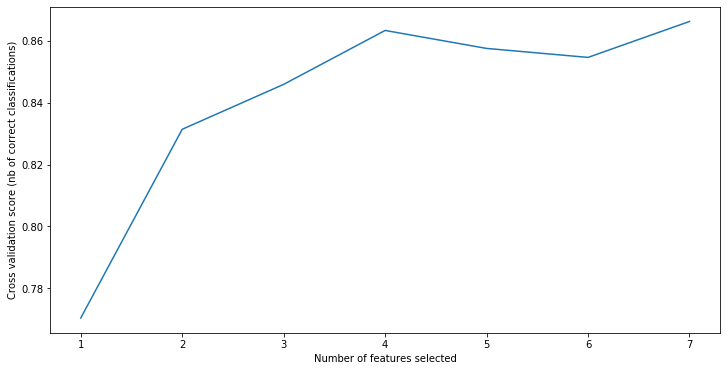

SVC
********************Hoe to evaluate model with learning curves********************


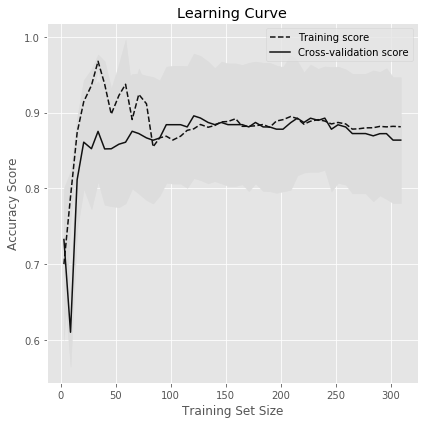

In [0]:
a,b=mf.Snippet_192(svm, X_test, y_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (a , b*2) )
mf.Snippet_191(svm, X_test, y_test)
mf.Snippet_188(X_test, y_test,svm)

*********************Hoe to visualise cross validation scores*********************
0.8818279124693408


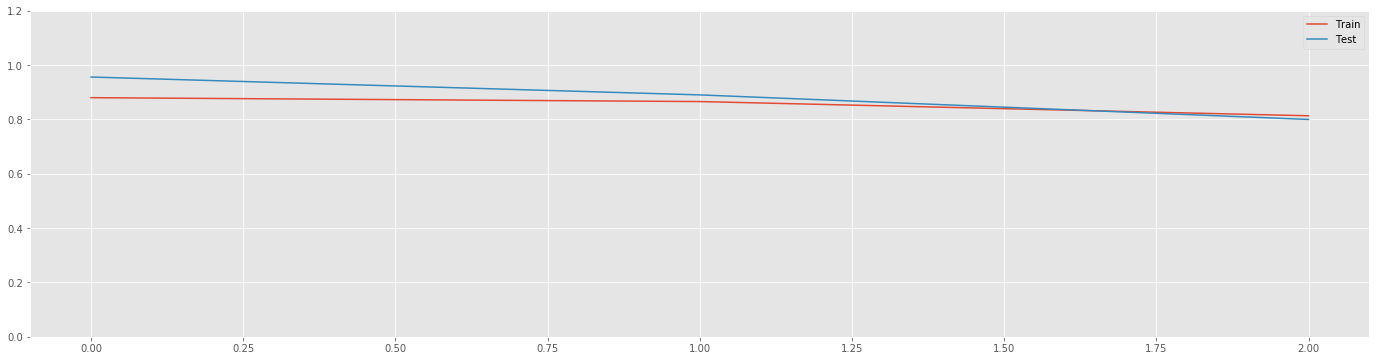

In [0]:
mf.Snippet_190(svm, X_test, y_test, 3)

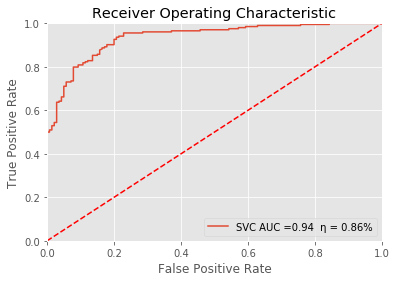

In [0]:
mf.ROC_(svm, X_test,y_test )

#In order to rebuild a similar model with future versions of scikit-learn, additional metadata should be saved along the pickled model:
The training data, e.g. a reference to an immutable snapshot

The python source code used to generate the model

The versions of scikit-learn and its dependencies

The cross validation score obtained on the training data

This should make it possible to check that the cross-validation score is in the same range as before.

In [0]:
import pickle

#from google.colab import files
#files.download('your typical text file or what ever.txt')
# Create your model here (same as above)
#

# Save to file in the current working directory
model=svm
pkl_filename = "/content/drive/My Drive/svm-pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
#Calculate the accuracy score and predict target values from recovered model
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
mf.Snippet_192(pickle_model, X_test, y_test)
Ypredict = pickle_model.predict(X_test)

Test score: 85.76 %
